In [164]:
import pickle 
import os
from datetime import datetime,timezone,timedelta

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm
from scipy import signal

import data_filter as dafi
import data_process as dapr
import lib_plot
import import_other_datasource as imoda

In [165]:
def dict_to_matrix(data_dict):
    data_dict_copy = data_dict.copy()

    y_max_ele = list(data_dict_copy.keys())
    x_t_r = list(data_dict_copy[y_max_ele[0]])
    y_max_ele.insert(0,0)
    x_t_r.insert(0,0)
    
    
    data2 = np.zeros((5,5))
    data3 = np.zeros((5,5))
    for i,ele in enumerate(data_dict):
        for j,t_range in enumerate(data_dict[ele]):
            data2[i,j]= data_dict[ele][t_range][2]
            data3[i,j]= data_dict[ele][t_range][3]
    return {'x_tick':x_t_r,'y_tick':y_max_ele,'data':[data2,data3]}

def analyze_accuracy(ts_dict):
    median_dict = {}
    std_dict = {}
    point_count_dict = {}
    for ele in ts_dict:
        std_dict[ele] = {}
        point_count_dict[ele] = {}
        median_dict[ele] = {}
        for t_range in ts_dict[ele]:
            std_dict[ele][t_range] = {}
            point_count_dict[ele][t_range] = {}
            median_dict[ele][t_range] = {}
            
            point_count_dict[ele][t_range][2] = len(list(ts_dict[ele][t_range][2].values()))
            point_count_dict[ele][t_range][3] = len(list(ts_dict[ele][t_range][3].values()))

            std_dict[ele][t_range][2] = np.std(list(ts_dict[ele][t_range][2].values()))
            std_dict[ele][t_range][3] = np.std(list(ts_dict[ele][t_range][3].values()))

            median_dict[ele][t_range][2] = np.median(list(ts_dict[ele][t_range][2].values()))
            median_dict[ele][t_range][3] = np.median(list(ts_dict[ele][t_range][3].values()))

    std_info = dict_to_matrix(std_dict)
    count_info = dict_to_matrix(point_count_dict)
    median_info = dict_to_matrix(median_dict)
    return (median_info,std_info,count_info)

In [166]:
with open('../data/generated_data/20220907.pkl', 'rb') as f:
    ts_dict = pickle.load(f)

(median_0907 ,std_0907,count_0907) = analyze_accuracy(ts_dict)

In [167]:
median_max = 282
median_min = 284

std_max = 0.3
std_min = 0.05

count_max = 140
count_min = 20

ante_h_0811 = imoda.get_antenne_height('0811')
ante_h_0907 = imoda.get_antenne_height('0907')
ante_h_1004 = imoda.get_antenne_height('1004')
ante_h_1031 = imoda.get_antenne_height('1031')
ante_h_1127 = imoda.get_antenne_height('1127')

C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\3846947227.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(median_0907['x_tick'])
C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\3846947227.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(median_0907['y_tick'])


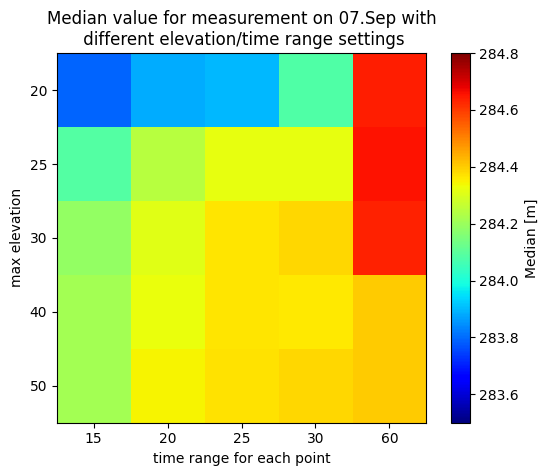

In [174]:
fig,ax = plt.subplots()
im = ax.imshow(ante_h_0811['2']-median_0907['data'][0],cmap='jet',vmax=284.8,vmin=283.5)
ax.set_xticklabels(median_0907['x_tick'])
ax.set_yticklabels(median_0907['y_tick'])
ax.set_ylabel('max elevation')
ax.set_xlabel('time range for each point')
ax.set_title('Median value for measurement on 07.Sep with\n different elevation/time range settings')

cbar =fig.colorbar(im)
cbar.set_label('Median [m]')
fig.savefig('picture/median09072.png')

C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\1066849956.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(median_0907['x_tick'])
C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\1066849956.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(median_0907['y_tick'])


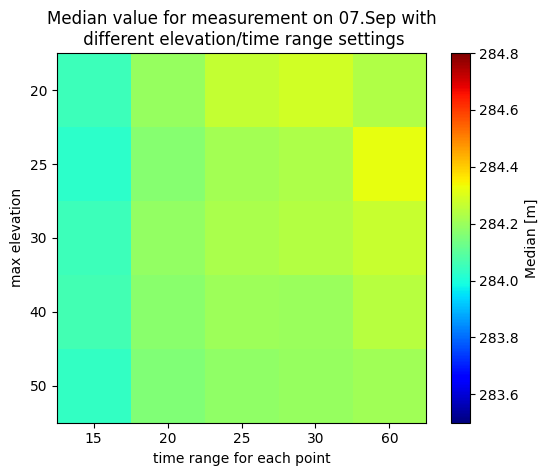

In [175]:
fig,ax = plt.subplots()
im = ax.imshow(ante_h_0811['3']-median_0907['data'][1],cmap='jet',vmax=284.8,vmin=283.5)
ax.set_xticklabels(median_0907['x_tick'])
ax.set_yticklabels(median_0907['y_tick'])
ax.set_ylabel('max elevation')
ax.set_xlabel('time range for each point')
ax.set_title('Median value for measurement on 07.Sep with\n different elevation/time range settings')

cbar =fig.colorbar(im)
cbar.set_label('Median [m]')
fig.savefig('picture/median09073.png')

C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\4143737160.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(std_0907['x_tick'])
C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\4143737160.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(std_0907['y_tick'])


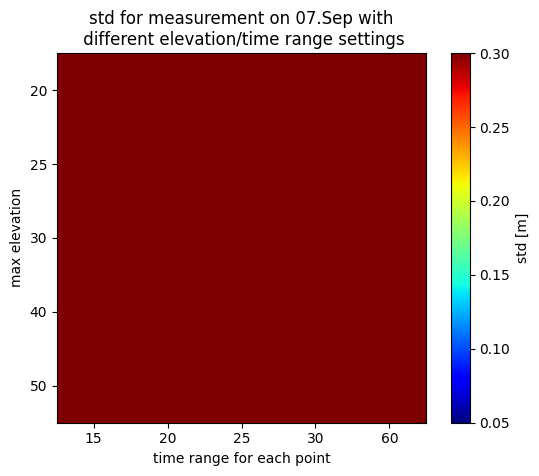

In [138]:
fig,ax = plt.subplots()
im = ax.imshow(std_0907['data'][0],cmap='jet',vmax=std_max,vmin=std_min)
ax.set_xticklabels(std_0907['x_tick'])
ax.set_yticklabels(std_0907['y_tick'])
ax.set_ylabel('max elevation')
ax.set_xlabel('time range for each point')
ax.set_title('std for measurement on 07.Sep with\n different elevation/time range settings')

cbar =fig.colorbar(im)
cbar.set_label('std [m]')
fig.savefig('picture/std09072.png')

C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\1584289730.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(std_0907['x_tick'])
C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\1584289730.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(std_0907['y_tick'])


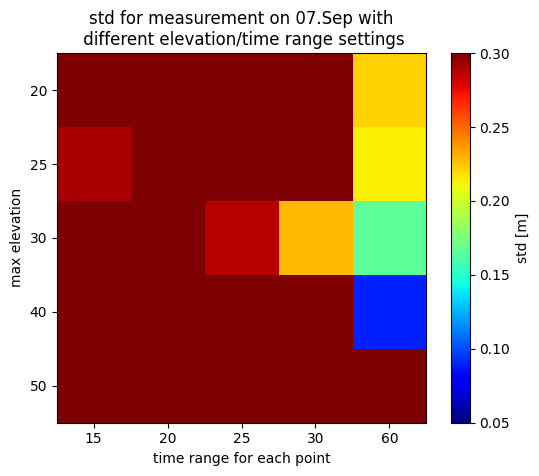

In [139]:
fig,ax = plt.subplots()
im = ax.imshow(std_0907['data'][1],cmap='jet',vmax=std_max,vmin=std_min)
ax.set_xticklabels(std_0907['x_tick'])
ax.set_yticklabels(std_0907['y_tick'])
ax.set_ylabel('max elevation')
ax.set_xlabel('time range for each point')
ax.set_title('std for measurement on 07.Sep with\n different elevation/time range settings')

cbar =fig.colorbar(im)
cbar.set_label('std [m]')
fig.savefig('picture/std09073.png')

C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\331211369.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(count_0907['x_tick'])
C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\331211369.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(count_0907['y_tick'])


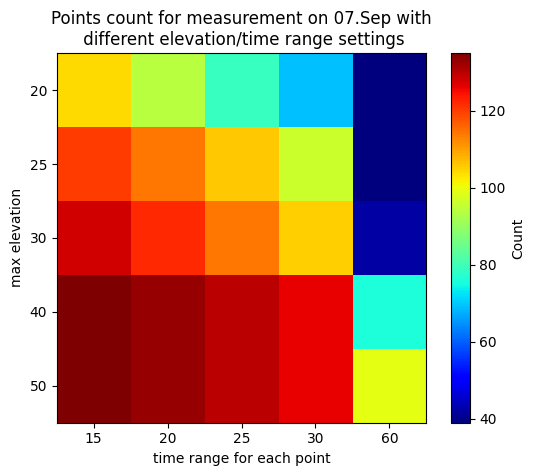

In [140]:
fig,ax = plt.subplots()
im = ax.imshow(count_0907['data'][0],cmap='jet')
ax.set_xticklabels(count_0907['x_tick'])
ax.set_yticklabels(count_0907['y_tick'])
ax.set_ylabel('max elevation')
ax.set_xlabel('time range for each point')
ax.set_title('Points count for measurement on 07.Sep with\n different elevation/time range settings')

cbar =fig.colorbar(im)
cbar.set_label('Count')
fig.savefig('picture/count09072.png')

C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\2420298837.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(count_0907['x_tick'])
C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\2420298837.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(count_0907['y_tick'])


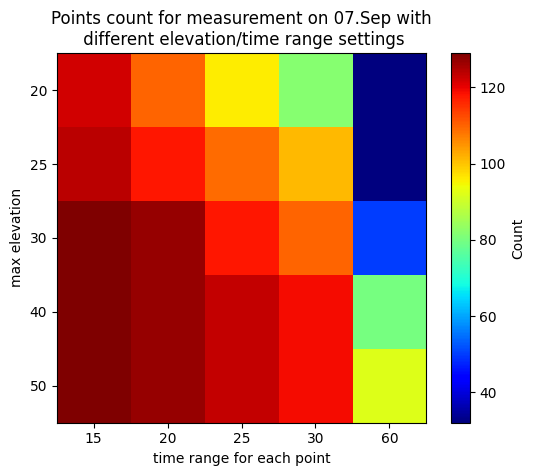

In [141]:
fig,ax = plt.subplots()
im = ax.imshow(count_0907['data'][1],cmap='jet')
ax.set_xticklabels(count_0907['x_tick'])
ax.set_yticklabels(count_0907['y_tick'])
ax.set_ylabel('max elevation')
ax.set_xlabel('time range for each point')
ax.set_title('Points count for measurement on 07.Sep with\n different elevation/time range settings')

cbar =fig.colorbar(im)
cbar.set_label('Count')
fig.savefig('picture/count09073.png')

In [142]:
with open('../data/generated_data/20221004.pkl', 'rb') as f:
    ts_dict = pickle.load(f)

(median_1004, std_1004,count_1004) = analyze_accuracy(ts_dict)

C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\3849189034.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(median_1004['x_tick'])
C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\3849189034.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(median_1004['y_tick'])


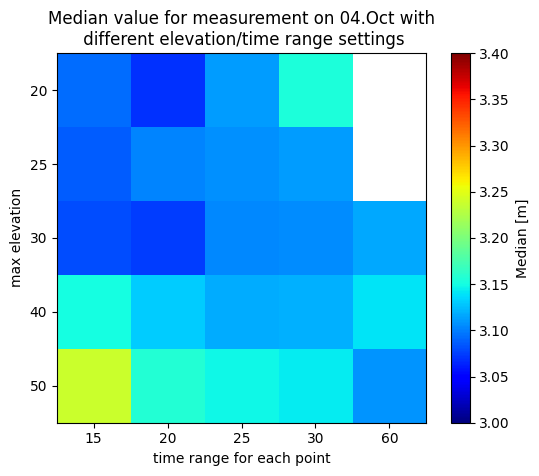

In [143]:
fig,ax = plt.subplots()
im = ax.imshow(median_1004['data'][0],cmap='jet',vmax=median_max,vmin=median_min)
ax.set_xticklabels(median_1004['x_tick'])
ax.set_yticklabels(median_1004['y_tick'])
ax.set_ylabel('max elevation')
ax.set_xlabel('time range for each point')
ax.set_title('Median value for measurement on 04.Oct with\n different elevation/time range settings')

cbar =fig.colorbar(im)
cbar.set_label('Median [m]')
fig.savefig('picture/median10042.png')

C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\3408681290.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(median_1004['x_tick'])
C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\3408681290.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(median_1004['y_tick'])


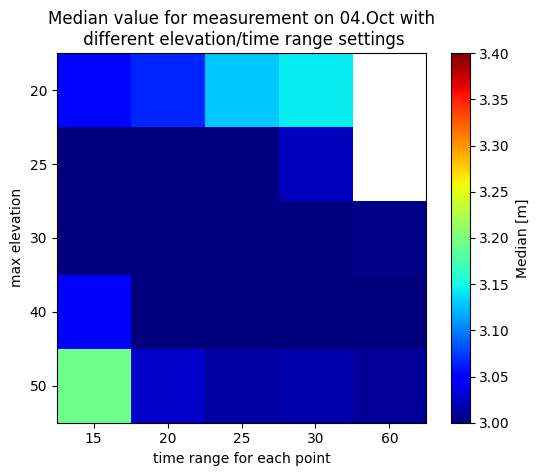

In [144]:
fig,ax = plt.subplots()
im = ax.imshow(median_1004['data'][1],cmap='jet',vmax=median_max,vmin=median_min)
ax.set_xticklabels(median_1004['x_tick'])
ax.set_yticklabels(median_1004['y_tick'])
ax.set_ylabel('max elevation')
ax.set_xlabel('time range for each point')
ax.set_title('Median value for measurement on 04.Oct with\n different elevation/time range settings')

cbar =fig.colorbar(im)
cbar.set_label('Median [m]')
fig.savefig('picture/median10043.png')

C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\3976192621.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(std_1004['x_tick'])
C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\3976192621.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(std_1004['y_tick'])


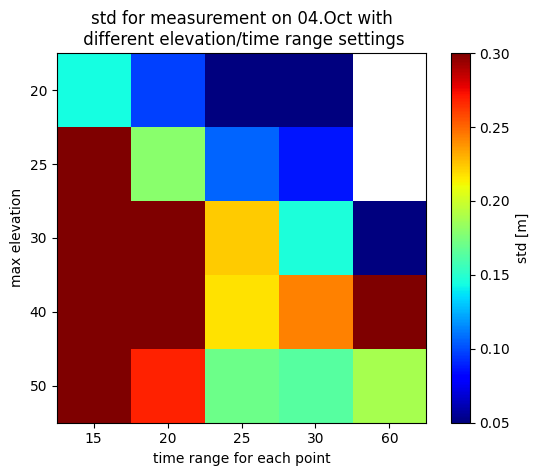

In [145]:
fig,ax = plt.subplots()
im = ax.imshow(std_1004['data'][0],cmap='jet',vmax=std_max,vmin=std_min)
ax.set_xticklabels(std_1004['x_tick'])
ax.set_yticklabels(std_1004['y_tick'])
ax.set_ylabel('max elevation')
ax.set_xlabel('time range for each point')
ax.set_title('std for measurement on 04.Oct with\n different elevation/time range settings')

cbar =fig.colorbar(im)
cbar.set_label('std [m]')
fig.savefig('picture/std10042.png')

C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\342816534.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(std_1004['x_tick'])
C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\342816534.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(std_1004['y_tick'])


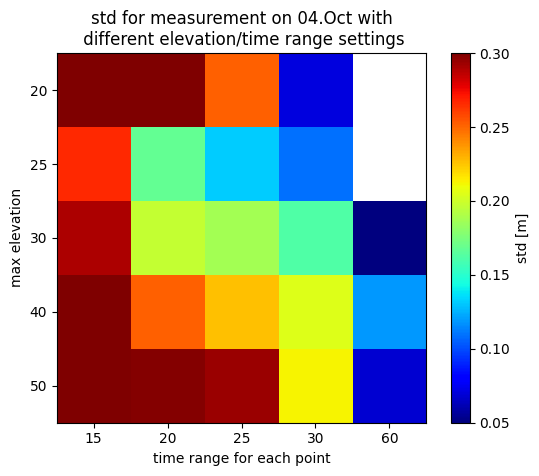

In [146]:
fig,ax = plt.subplots()
im = ax.imshow(std_1004['data'][1],cmap='jet',vmax=std_max,vmin=std_min)
ax.set_xticklabels(std_1004['x_tick'])
ax.set_yticklabels(std_1004['y_tick'])
ax.set_ylabel('max elevation')
ax.set_xlabel('time range for each point')
ax.set_title('std for measurement on 04.Oct with\n different elevation/time range settings')

cbar =fig.colorbar(im)
cbar.set_label('std [m]')
fig.savefig('picture/std10043.png')

C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\1887628608.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(count_1004['x_tick'])
C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\1887628608.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(count_1004['y_tick'])


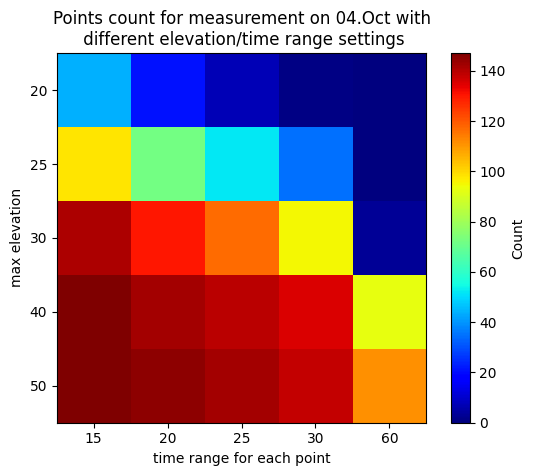

In [147]:
fig,ax = plt.subplots()
im = ax.imshow(count_1004['data'][0],cmap='jet')
ax.set_xticklabels(count_1004['x_tick'])
ax.set_yticklabels(count_1004['y_tick'])
ax.set_ylabel('max elevation')
ax.set_xlabel('time range for each point')
ax.set_title('Points count for measurement on 04.Oct with\n different elevation/time range settings')

cbar =fig.colorbar(im)
cbar.set_label('Count')
fig.savefig('picture/count10042.png')

C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\2632639958.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(count_1004['x_tick'])
C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\2632639958.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(count_1004['y_tick'])


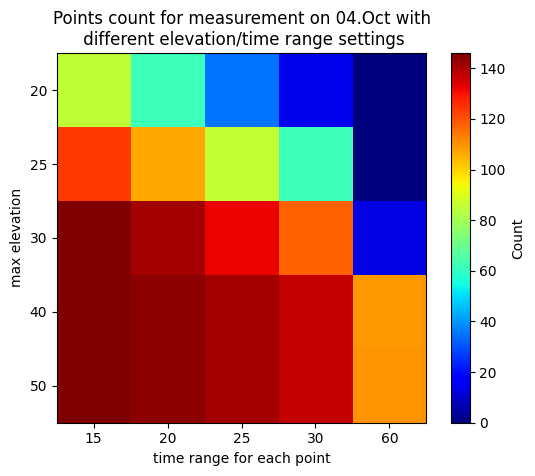

In [148]:
fig,ax = plt.subplots()
im = ax.imshow(count_1004['data'][1],cmap='jet')
ax.set_xticklabels(count_1004['x_tick'])
ax.set_yticklabels(count_1004['y_tick'])
ax.set_ylabel('max elevation')
ax.set_xlabel('time range for each point')
ax.set_title('Points count for measurement on 04.Oct with\n different elevation/time range settings')

cbar =fig.colorbar(im)
cbar.set_label('Count')
fig.savefig('picture/count10043.png')

In [149]:
with open('../data/generated_data/20221031.pkl', 'rb') as f:
    ts_dict = pickle.load(f)

(median_1031, std_1031,count_1031) = analyze_accuracy(ts_dict)

C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\1990019483.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(median_1031['x_tick'])
C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\1990019483.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(median_1031['y_tick'])


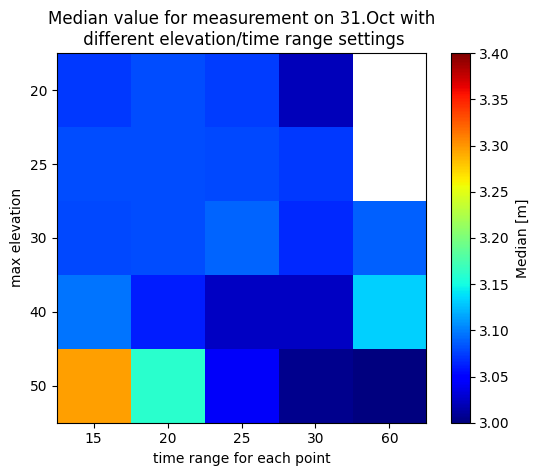

In [150]:
fig,ax = plt.subplots()
im = ax.imshow(median_1031['data'][0],cmap='jet',vmax=median_max,vmin=median_min)
ax.set_xticklabels(median_1031['x_tick'])
ax.set_yticklabels(median_1031['y_tick'])
ax.set_ylabel('max elevation')
ax.set_xlabel('time range for each point')
ax.set_title('Median value for measurement on 31.Oct with\n different elevation/time range settings')

cbar =fig.colorbar(im)
cbar.set_label('Median [m]')
fig.savefig('picture/median10312.png')

C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\2502823093.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(median_1031['x_tick'])
C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\2502823093.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(median_1031['y_tick'])


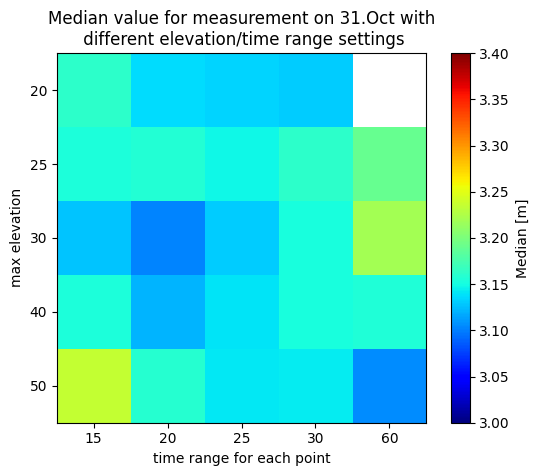

In [151]:
fig,ax = plt.subplots()
im = ax.imshow(median_1031['data'][1],cmap='jet',vmax=median_max,vmin=median_min)
ax.set_xticklabels(median_1031['x_tick'])
ax.set_yticklabels(median_1031['y_tick'])
ax.set_ylabel('max elevation')
ax.set_xlabel('time range for each point')
ax.set_title('Median value for measurement on 31.Oct with\n different elevation/time range settings')

cbar =fig.colorbar(im)
cbar.set_label('Median [m]')
fig.savefig('picture/median10313.png')

C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\1412104846.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(std_1031['x_tick'])
C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\1412104846.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(std_1031['y_tick'])


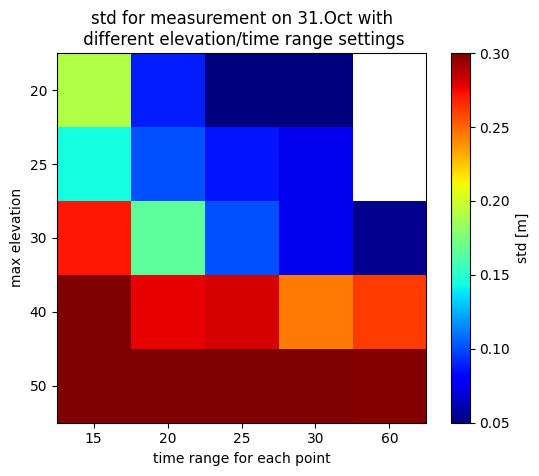

In [152]:
fig,ax = plt.subplots()
im = ax.imshow(std_1031['data'][0],cmap='jet',vmax=std_max,vmin=std_min)
ax.set_xticklabels(std_1031['x_tick'])
ax.set_yticklabels(std_1031['y_tick'])
ax.set_ylabel('max elevation')
ax.set_xlabel('time range for each point')
ax.set_title('std for measurement on 31.Oct with\n different elevation/time range settings')

cbar =fig.colorbar(im)
cbar.set_label('std [m]')
fig.savefig('picture/std10312.png')

C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\2327479482.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(std_1031['x_tick'])
C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\2327479482.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(std_1031['y_tick'])


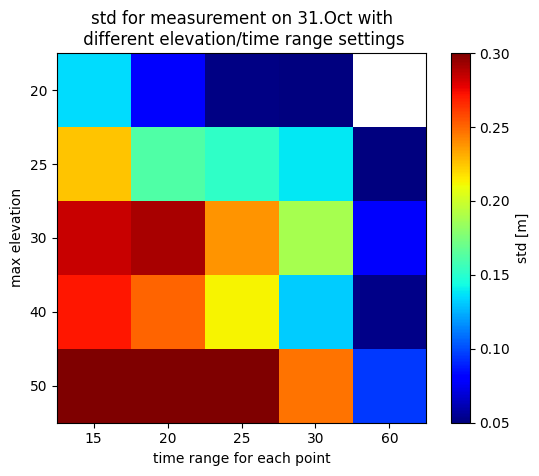

In [153]:
fig,ax = plt.subplots()
im = ax.imshow(std_1031['data'][1],cmap='jet',vmax=std_max,vmin=std_min)
ax.set_xticklabels(std_1031['x_tick'])
ax.set_yticklabels(std_1031['y_tick'])
ax.set_ylabel('max elevation')
ax.set_xlabel('time range for each point')
ax.set_title('std for measurement on 31.Oct with\n different elevation/time range settings')

cbar =fig.colorbar(im)
cbar.set_label('std [m]')
fig.savefig('picture/std10313.png')

C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\1849201072.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(count_1031['x_tick'])
C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\1849201072.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(count_1031['y_tick'])


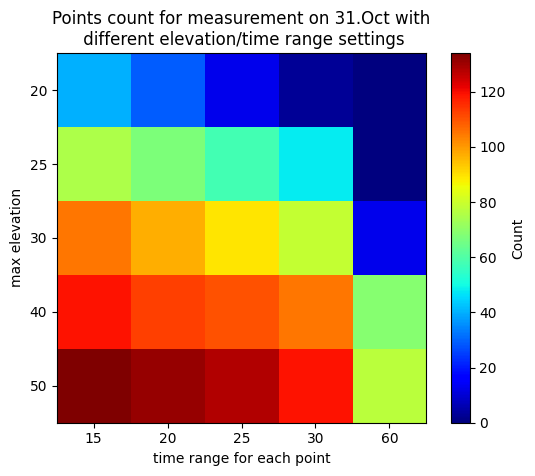

In [154]:
fig,ax = plt.subplots()
im = ax.imshow(count_1031['data'][0],cmap='jet')
ax.set_xticklabels(count_1031['x_tick'])
ax.set_yticklabels(count_1031['y_tick'])
ax.set_ylabel('max elevation')
ax.set_xlabel('time range for each point')
ax.set_title('Points count for measurement on 31.Oct with\n different elevation/time range settings')

cbar =fig.colorbar(im)
cbar.set_label('Count')
fig.savefig('picture/count10312.png')

C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\344948080.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(count_1031['x_tick'])
C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\344948080.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(count_1031['y_tick'])


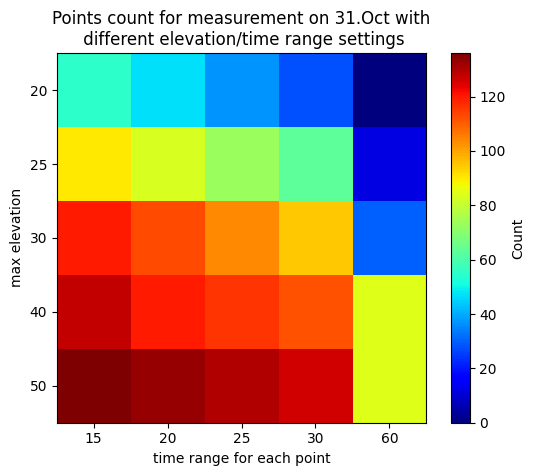

In [155]:
fig,ax = plt.subplots()
im = ax.imshow(count_1031['data'][1],cmap='jet')
ax.set_xticklabels(count_1031['x_tick'])
ax.set_yticklabels(count_1031['y_tick'])
ax.set_ylabel('max elevation')
ax.set_xlabel('time range for each point')
ax.set_title('Points count for measurement on 31.Oct with\n different elevation/time range settings')

cbar =fig.colorbar(im)
cbar.set_label('Count')
fig.savefig('picture/count10313.png')

In [156]:
with open('../data/generated_data/20221127.pkl', 'rb') as f:
    ts_dict = pickle.load(f)

(median_1127, std_1127,count_1127) = analyze_accuracy(ts_dict)

C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\1754387323.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(median_1127['x_tick'])
C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\1754387323.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(median_1127['y_tick'])


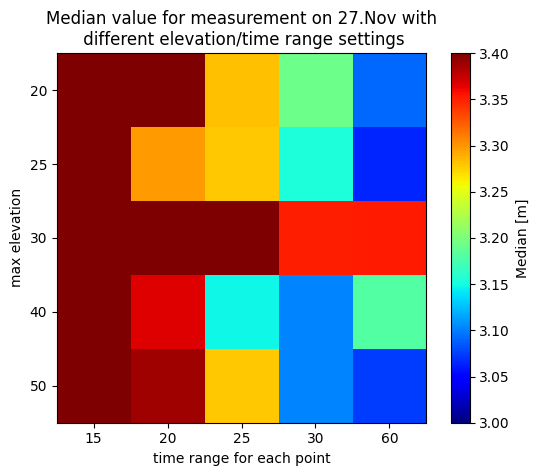

In [157]:
fig,ax = plt.subplots()
im = ax.imshow(median_1127['data'][0],cmap='jet',vmax=median_max,vmin=median_min)
ax.set_xticklabels(median_1127['x_tick'])
ax.set_yticklabels(median_1127['y_tick'])
ax.set_ylabel('max elevation')
ax.set_xlabel('time range for each point')
ax.set_title('Median value for measurement on 27.Nov with\n different elevation/time range settings')

cbar =fig.colorbar(im)
cbar.set_label('Median [m]')
fig.savefig('picture/median11272.png')

C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\33365252.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(median_1127['x_tick'])
C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\33365252.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(median_1127['y_tick'])


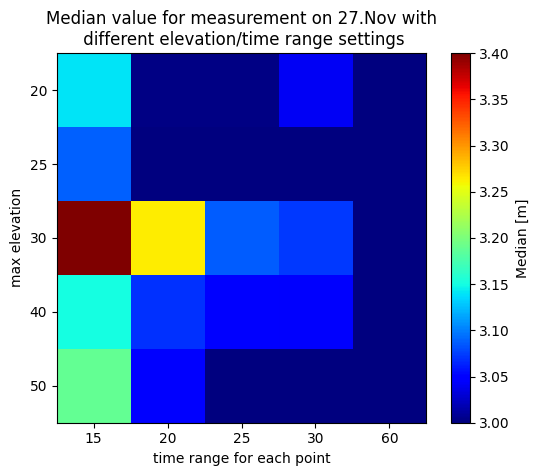

In [158]:
fig,ax = plt.subplots()
im = ax.imshow(median_1127['data'][1],cmap='jet',vmax=median_max,vmin=median_min)
ax.set_xticklabels(median_1127['x_tick'])
ax.set_yticklabels(median_1127['y_tick'])
ax.set_ylabel('max elevation')
ax.set_xlabel('time range for each point')
ax.set_title('Median value for measurement on 27.Nov with\n different elevation/time range settings')

cbar =fig.colorbar(im)
cbar.set_label('Median [m]')
fig.savefig('picture/median11273.png')

C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\1669355145.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(std_1127['x_tick'])
C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\1669355145.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(std_1127['y_tick'])


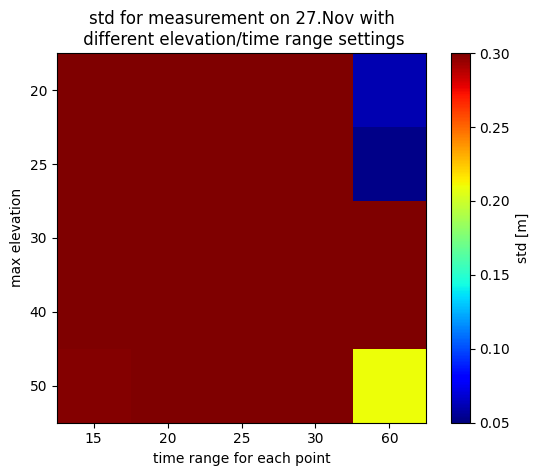

In [159]:
fig,ax = plt.subplots()
im = ax.imshow(std_1127['data'][0],cmap='jet',vmax=std_max,vmin=std_min)
ax.set_xticklabels(std_1127['x_tick'])
ax.set_yticklabels(std_1127['y_tick'])
ax.set_ylabel('max elevation')
ax.set_xlabel('time range for each point')
ax.set_title('std for measurement on 27.Nov with\n different elevation/time range settings')

cbar =fig.colorbar(im)
cbar.set_label('std [m]')
fig.savefig('picture/std11272.png')

C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\1804332639.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(std_1127['x_tick'])
C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\1804332639.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(std_1127['y_tick'])


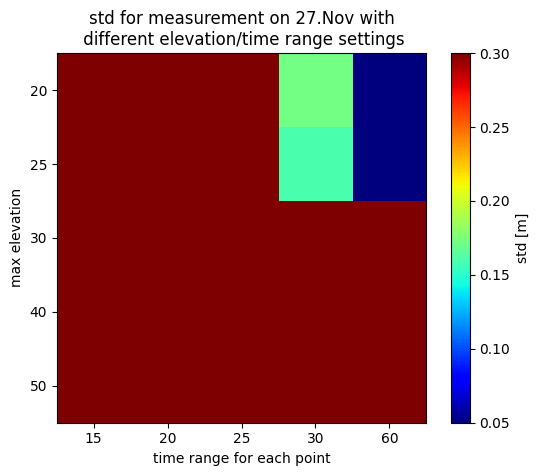

In [160]:
fig,ax = plt.subplots()
im = ax.imshow(std_1127['data'][1],cmap='jet',vmax=std_max,vmin=std_min)
ax.set_xticklabels(std_1127['x_tick'])
ax.set_yticklabels(std_1127['y_tick'])
ax.set_ylabel('max elevation')
ax.set_xlabel('time range for each point')
ax.set_title('std for measurement on 27.Nov with\n different elevation/time range settings')

cbar =fig.colorbar(im)
cbar.set_label('std [m]')
fig.savefig('picture/std11273.png')

C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\3397138208.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(count_1127['x_tick'])
C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\3397138208.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(count_1127['y_tick'])


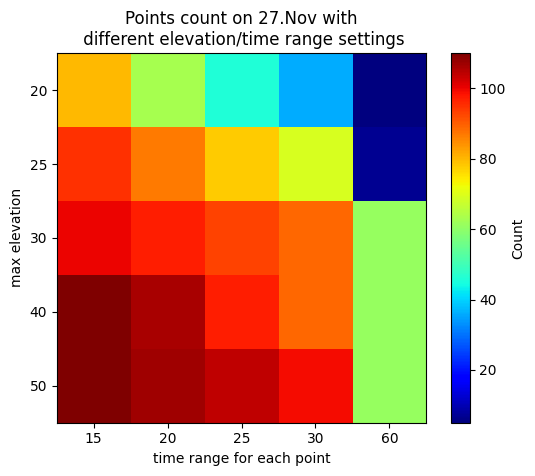

In [161]:
fig,ax = plt.subplots()
im = ax.imshow(count_1127['data'][0],cmap='jet')
ax.set_xticklabels(count_1127['x_tick'])
ax.set_yticklabels(count_1127['y_tick'])
ax.set_ylabel('max elevation')
ax.set_xlabel('time range for each point')
ax.set_title('Points count on 27.Nov with\n different elevation/time range settings')

cbar =fig.colorbar(im)
cbar.set_label('Count')
fig.savefig('picture/count11272.png')

C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\1187777521.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(count_1127['x_tick'])
C:\Users\yuziq\AppData\Local\Temp\ipykernel_2868\1187777521.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(count_1127['y_tick'])


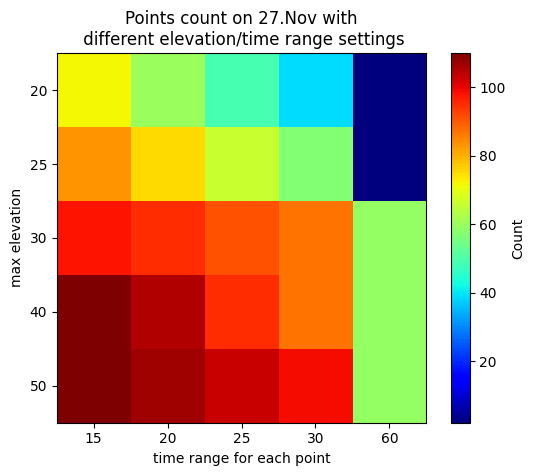

In [162]:
fig,ax = plt.subplots()
im = ax.imshow(count_1127['data'][1],cmap='jet')
ax.set_xticklabels(count_1127['x_tick'])
ax.set_yticklabels(count_1127['y_tick'])
ax.set_ylabel('max elevation')
ax.set_xlabel('time range for each point')
ax.set_title('Points count on 27.Nov with\n different elevation/time range settings')

cbar =fig.colorbar(im)
cbar.set_label('Count')
fig.savefig('picture/count11273.png')